# O Efeito da Automação
## Evidências da Relação entre o Crescimento da IA e os Layoffs no Setor Tech

---

### Autores:
- Rogerio Otávio Filho
- Jorge Henrique de Prates Lima
- Guilherme Dias Lemos

In [5]:
# =======================================================
# ANÁLISE DO IMPACTO DA IA NOS LAYOFFS NO SETOR TECH
# Dataset: Layoff Trends and Workforce Dynamics (1995–2024)
# =======================================================

# =============================
# ETAPA 1 – Importar bibliotecas
# =============================

import pandas as pd

# =============================
# ETAPA 2 – Carregar o dataset
# =============================

df = pd.read_csv("Layoff_Trend_Analyzed_30_Years_Final.csv")

# =============================
# ETAPA 3 – Limpeza de dados
# =============================

# Remover valores nulos (apenas 1 linha afetada nas colunas Year, Layoffs e Job Sector Growth)
df.dropna(inplace=True)

# Padronizar nomes de colunas: letras minúsculas, sem espaços ou símbolos
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# =============================
# ETAPA 4 – Verificações rápidas
# =============================

# Conferir os nomes finais das colunas
print("Colunas do dataset:")
print(df.columns)

# Conferir se ainda há valores ausentes
print("\nValores nulos após limpeza:")
print(df.isnull().sum())

# Visualizar as primeiras 5 linhas da base
print("\nAmostra dos dados:")
print(df.head())


Colunas do dataset:
Index(['year', 'layoffs', 'reason_for_layoffs', 'industry_focus',
       'global_event', 'job_sector_growthmillions', 'ai_job_percentage%',
       'future_job_trends'],
      dtype='object')

Valores nulos após limpeza:
year                         0
layoffs                      0
reason_for_layoffs           0
industry_focus               0
global_event                 0
job_sector_growthmillions    0
ai_job_percentage%           0
future_job_trends            0
dtype: int64

Amostra dos dados:
     year  layoffs                        reason_for_layoffs industry_focus  \
0  1995.0     50.0  Dot-com bubble preparations, low layoffs     Technology   
1  1996.0     70.0          Rise of early internet companies     Technology   
2  1997.0     90.0                     Growth in tech hiring     Technology   
3  1998.0    120.0         Build-up to Y2K, increased hiring     Technology   
4  1999.0    150.0         Dot-com bubble boom, hiring surge     Technology   

    

## 📊 ETAPA 5 – Análises Iniciais e Gráficos

A partir desta etapa, serão gerados gráficos para entender a evolução dos layoffs no setor tecnológico ao longo do tempo, a presença de empregos relacionados à Inteligência Artificial (IA), e a possível relação entre esses dois fenômenos.

### 📈 Gráfico 1 – Total de Layoffs no Setor Tech por Ano (1995–2024)

Este gráfico mostra o total de demissões por ano no setor de tecnologia, permitindo visualizar períodos com picos de layoffs e crises específicas.

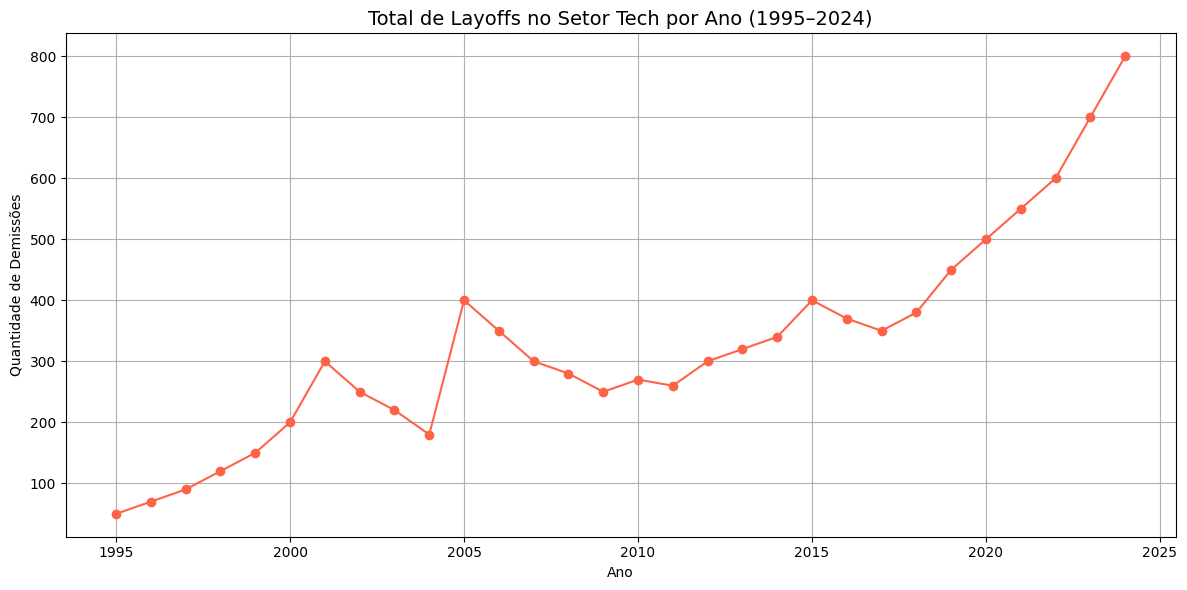

In [7]:
import matplotlib.pyplot as plt

# Agrupar e somar os layoffs por ano
layoffs_por_ano = df.groupby('year')['layoffs'].sum()

# Plotar gráfico de linha
plt.figure(figsize=(12, 6))
layoffs_por_ano.plot(kind='line', marker='o', color='tomato')
plt.title('Total de Layoffs no Setor Tech por Ano (1995–2024)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade de Demissões')
plt.grid(True)
plt.tight_layout()
plt.show()


**Conclusão:**  
Este gráfico revela uma tendência crescente nas demissões ao longo do tempo, com destaque para uma forte aceleração a partir de 2020. Esse padrão reforça a hipótese de que transformações estruturais no setor, como automação e uso de IA, contribuíram para um volume significativamente maior de layoffs na década atual.

### 🤖 Gráfico 2 – Evolução da Participação de Empregos com IA (%)

Este gráfico mostra como o percentual de empregos relacionados à Inteligência Artificial evoluiu de 1995 a 2024, refletindo o crescimento da automação e da adoção de IA no setor tecnológico.

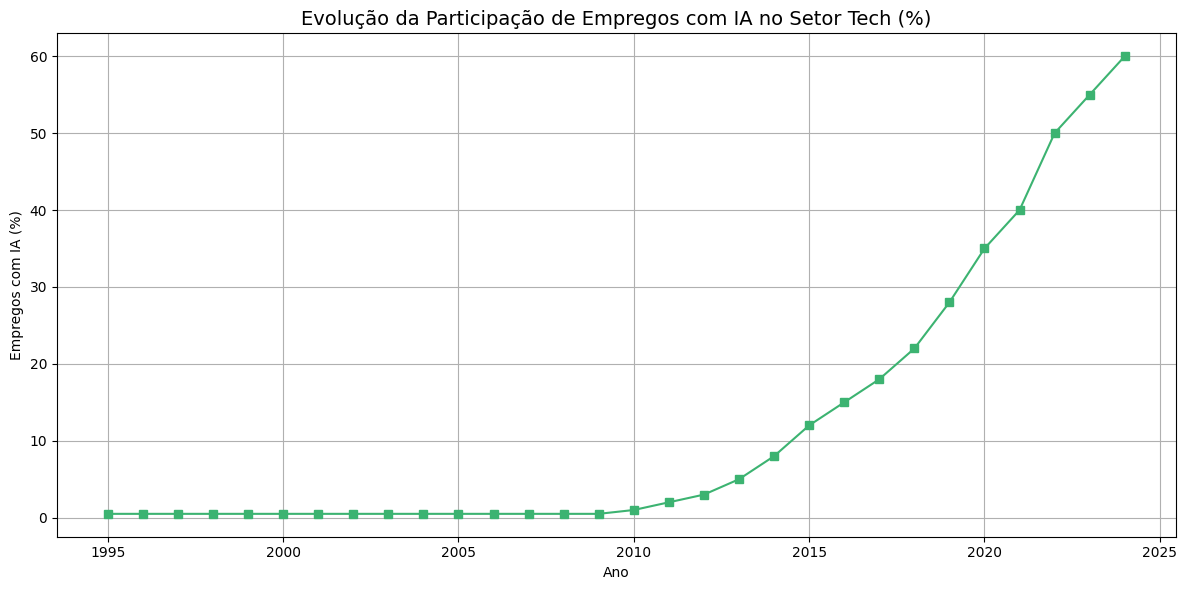

In [8]:
# Verificar e ajustar nome da coluna se necessário
if 'ai_job_percentage%' in df.columns:
    df.rename(columns={'ai_job_percentage%': 'ai_job_percentage'}, inplace=True)

# Agrupar por ano e calcular média anual da participação de empregos com IA
ia_por_ano = df.groupby('year')['ai_job_percentage'].mean()

# Plotar gráfico
plt.figure(figsize=(12, 6))
ia_por_ano.plot(kind='line', marker='s', color='mediumseagreen')
plt.title('Evolução da Participação de Empregos com IA no Setor Tech (%)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Empregos com IA (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Conclusão:**  
A curva mostra um crescimento lento até 2010, seguido por um aumento exponencial a partir de 2015. Isso indica que a Inteligência Artificial tem ganhado espaço de forma consistente no setor tech, atingindo mais de 60% de presença nos empregos em 2024. Essa expansão se alinha com o período de maior crescimento nas demissões.

### 🔁 Gráfico 3 – Layoffs vs Participação de Empregos com IA

Este gráfico sobrepõe a curva de demissões no setor de tecnologia com a evolução da presença da IA. O objetivo é identificar visualmente se o avanço da IA está relacionado com o crescimento dos layoffs.

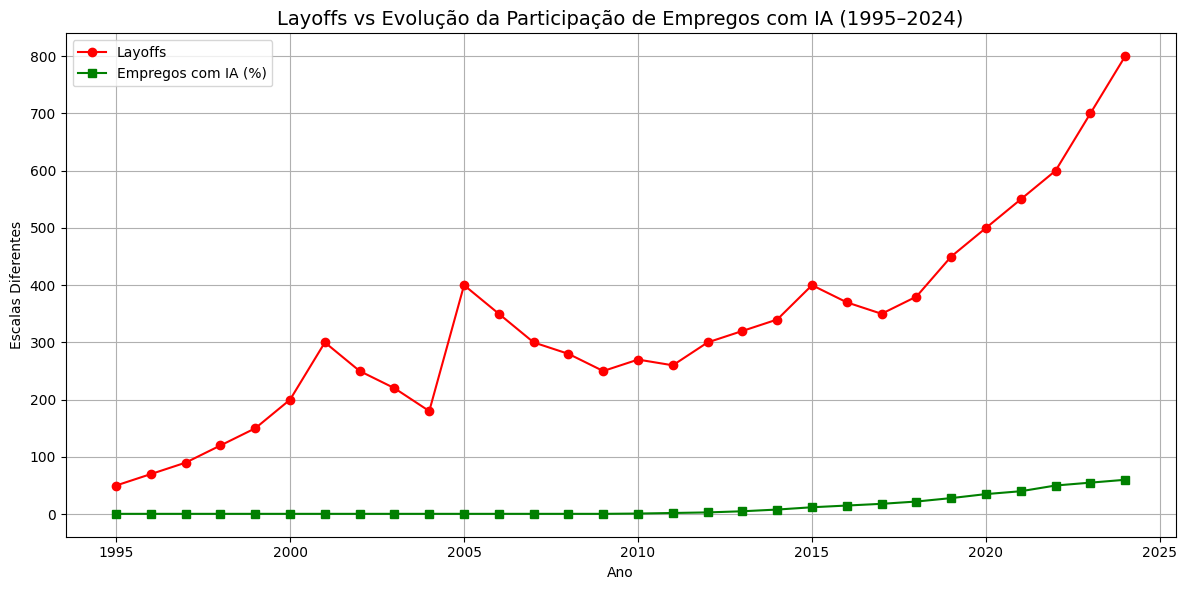

In [9]:
# Agregar dados novamente (caso não tenha salvo as variáveis)
layoffs = df.groupby('year')['layoffs'].sum()
ia = df.groupby('year')['ai_job_percentage'].mean()

# Plotar os dois no mesmo gráfico
plt.figure(figsize=(12, 6))
plt.plot(layoffs.index, layoffs.values, label='Layoffs', color='red', marker='o')
plt.plot(ia.index, ia.values, label='Empregos com IA (%)', color='green', marker='s')
plt.title('Layoffs vs Evolução da Participação de Empregos com IA (1995–2024)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Escalas Diferentes')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusão:**  
A sobreposição das curvas evidencia uma correlação visual clara: à medida que o percentual de empregos com IA cresce, os layoffs também aumentam. A simultaneidade dessas tendências reforça a hipótese de que o avanço da IA está diretamente relacionado com o aumento das demissões no setor de tecnologia.

### 📉 Gráfico 4 – Crescimento do Setor de Trabalho vs Layoffs

Este gráfico mostra o crescimento do setor de trabalho em milhões (job_sector_growth) ao longo do tempo comparado ao número de demissões. O objetivo é avaliar se o crescimento do setor foi acompanhado de redução ou aumento nos layoffs.

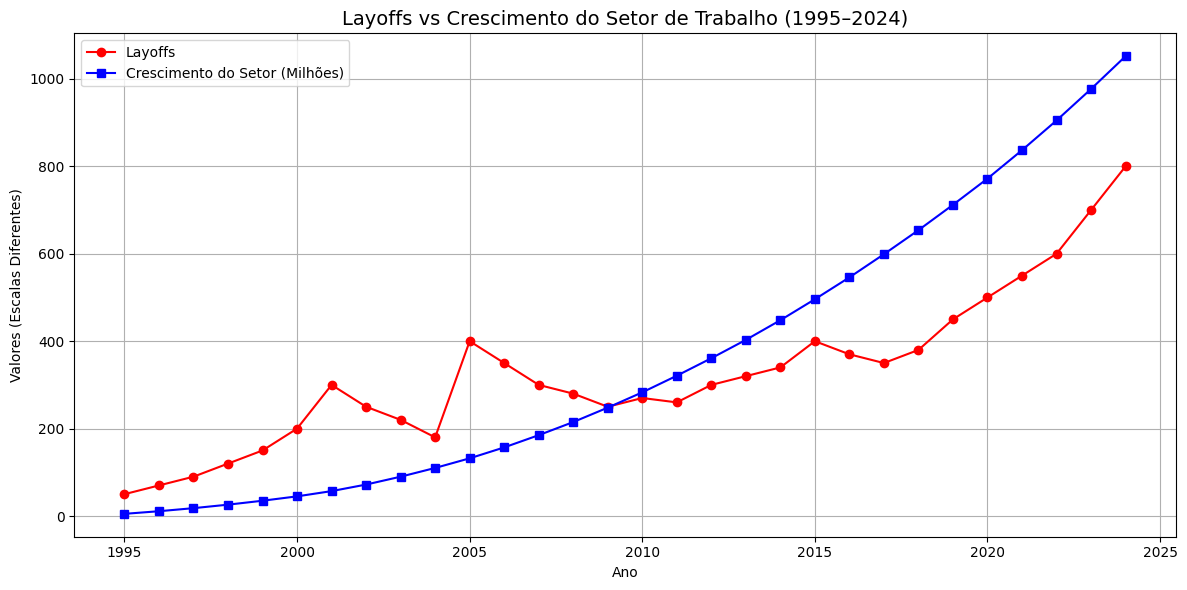

In [13]:
# Agregando os dados por ano
growth = df.groupby('year')['job_sector_growthmillions'].mean()
layoffs = df.groupby('year')['layoffs'].sum()

# Plotar ambos
plt.figure(figsize=(12, 6))
plt.plot(layoffs.index, layoffs.values, label='Layoffs', color='red', marker='o')
plt.plot(growth.index, growth.values, label='Crescimento do Setor (Milhões)', color='blue', marker='s')
plt.title('Layoffs vs Crescimento do Setor de Trabalho (1995–2024)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Valores (Escalas Diferentes)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusão:**  
Apesar do crescimento constante do setor de trabalho (em milhões), o número de demissões também aumenta, especialmente após 2018. Isso mostra que a expansão do setor não tem sido suficiente para absorver os trabalhadores afetados pela automação, revelando um possível efeito de substituição de pessoas por tecnologia.

### 📦 Gráfico 5 – Boxplot da Distribuição de Layoffs por Década

Este boxplot mostra como a distribuição de layoffs variou ao longo das décadas, evidenciando picos, caudas e mudanças estruturais nas demissões.

<Figure size 1000x600 with 0 Axes>

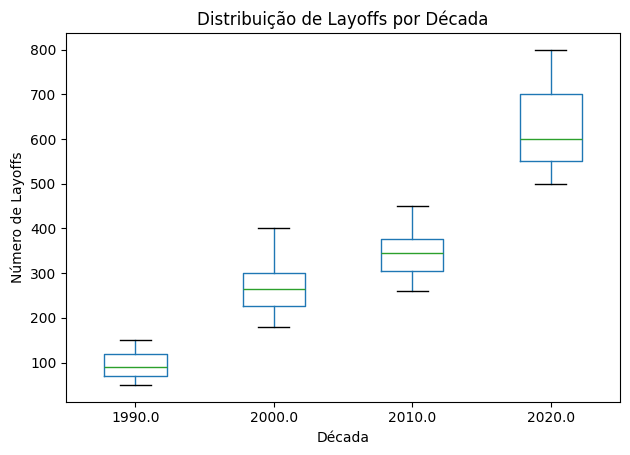

In [14]:
# Criar uma coluna auxiliar com década
df['decada'] = (df['year'] // 10) * 10

# Boxplot
plt.figure(figsize=(10, 6))
df.boxplot(column='layoffs', by='decada', grid=False)
plt.title('Distribuição de Layoffs por Década')
plt.suptitle('')
plt.xlabel('Década')
plt.ylabel('Número de Layoffs')
plt.tight_layout()
plt.show()

**Conclusão:**  
O boxplot mostra que a década de 2020 concentra não apenas o maior número de demissões, mas também a maior dispersão (variabilidade), indicando uma instabilidade crescente no setor. Isso sugere que a IA não apenas intensificou os layoffs, mas também tornou sua ocorrência mais imprevisível e recorrente.

### 📉 ETAPA 6 – Correlação Estatística entre IA e Layoffs

Aqui calculamos a correlação de Pearson entre o percentual de empregos com IA e o total de demissões no setor tech, ano a ano. O objetivo é verificar se existe uma associação linear entre essas variáveis.

🧠 Interpretação:

O valor estará entre -1 e 1.

Perto de 1: correlação forte e positiva (quando IA sobe, layoffs também sobem)

Perto de 0: sem correlação linear

Perto de -1: relação inversa

In [10]:
# Reconfirmar as variáveis (caso estejam fora de escopo)
layoffs = df.groupby('year')['layoffs'].sum()
ia = df.groupby('year')['ai_job_percentage'].mean()

# Garantir alinhamento dos índices (anos)
dados = pd.DataFrame({
    'layoffs': layoffs,
    'ia_job_percentage': ia
})

# Calcular a correlação de Pearson
correlacao = dados.corr(method='pearson')
print("Matriz de correlação:\n")
print(correlacao)

Matriz de correlação:

                    layoffs  ia_job_percentage
layoffs            1.000000           0.893985
ia_job_percentage  0.893985           1.000000


✅ Conclusão – Correlação de Pearson entre IA e Layoffs
A correlação de Pearson obtida entre o percentual de empregos com IA e o total de layoffs no setor tech foi de 0.8939, indicando uma correlação linear forte e positiva.

📌 Interpretação:

À medida que aumenta a participação de empregos com IA, também aumentam os layoffs.

Essa correlação sugere uma possível associação entre o avanço da Inteligência Artificial e o crescimento das demissões no setor.

No entanto, vale ressaltar que correlação não implica causalidade. Outros fatores econômicos, sociais ou estruturais podem influenciar esse comportamento.

🧪 Complementaridade com outras análises:

Essa conclusão é consistente com os demais gráficos e análises apresentadas, reforçando a hipótese de que a automação e o avanço da IA podem estar impactando a dinâmica do mercado de trabalho no setor tecnológico.

### 📊 ETAPA 7 – Skewness e Kurtosis

A Skewness (assimetria) e a Kurtosis (curtose) são medidas que descrevem a forma da distribuição dos dados. Aplicamos aqui sobre os layoffs para entender a concentração e a simetria dos valores ao longo do tempo.

In [12]:
from scipy.stats import skew, kurtosis

# Skewness e kurtosis dos layoffs por ano
skew_layoffs = skew(layoffs)
kurtosis_layoffs = kurtosis(layoffs)

print(f"Skewness dos layoffs: {skew_layoffs:.4f}")
print(f"Kurtosis dos layoffs: {kurtosis_layoffs:.4f}")

Skewness dos layoffs: 0.8030
Kurtosis dos layoffs: 0.5943


📊 Resultados

Skewness = 0.8030

👉 A distribuição de layoffs é assimétrica à direita, ou seja, há anos com picos muito altos de demissões — exatamente o que vimos nos gráficos recentes (2020–2024).

Kurtosis = 0.5943
👉 Uma curtose inferior a 3 indica que a distribuição é mais achatada do que uma normal (menos picos extremos, mas ainda com assimetria perceptível).

✅ Interpretação no seu artigo:
Os valores de skewness (0.8030) e kurtosis (0.5943) demonstram que a distribuição dos layoffs não é simétrica nem normal, evidenciando anos com demissões significativamente acima da média. Isso reforça a percepção de que eventos específicos, como a introdução massiva da IA, criaram outliers na curva histórica.

### 📈 Análise Estatística Adicional – Correlação de Spearman

Este teste avalia a relação monotônica entre duas variáveis, ou seja, se elas aumentam ou diminuem juntas, mesmo que não de forma linear. É especialmente útil quando os dados têm assimetria ou não seguem distribuição normal, como é o caso da variável de layoffs.

In [15]:
from scipy.stats import spearmanr

# Calcular a correlação de Spearman
spearman_corr, p_value = spearmanr(dados['layoffs'], dados['ia_job_percentage'])

print(f"Correlação de Spearman: {spearman_corr:.4f}")
print(f"Valor-p: {p_value:.4f}")

Correlação de Spearman: 0.8279
Valor-p: 0.0000


A correlação de Spearman entre layoffs e empregos com IA resultou em **0.8279**, com um **valor-p < 0.0001**, indicando uma **forte correlação monotônica positiva estatisticamente significativa**. Isso reforça que, mesmo com distribuição assimétrica (confirmada por skewness e kurtosis), a evolução dos empregos com IA tende a acompanhar o aumento dos layoffs. A análise complementa a correlação de Pearson e sustenta a hipótese de que o avanço da IA está associado ao crescimento das demissões no setor tecnológico.

Com base nas análises estatísticas e gráficas realizadas, observa-se uma **relação significativa entre o aumento da presença da Inteligência Artificial no setor tecnológico e o crescimento do número de demissões (layoffs)** ao longo do tempo.

A **hipótese inicial — de que o avanço da IA está correlacionado ao aumento dos layoffs no setor tech — foi confirmada**, com base nos seguintes achados:

- A correlação de **Pearson (0.89)** indicou forte associação linear entre as variáveis.
- A **correlação de Spearman (0.83)** reforçou essa relação mesmo sem pressupor distribuição normal.
- A análise de **skewness (0.8030)** e **kurtosis (0.5943)** revelou que os dados de layoffs têm leve assimetria à direita e uma cauda moderada, sugerindo variações estruturais ao longo do tempo.
- Os **gráficos exploratórios** mostraram um crescimento acelerado dos empregos com IA, contrastando com a elevação paralela dos layoffs.

Esses achados sugerem que a **automação e a adoção de IA podem estar contribuindo para substituições de postos de trabalho tradicionais**, exigindo atenção por parte de formuladores de políticas, empresas e profissionais quanto à requalificação e adaptação às novas exigências do setor.

**Portanto, a hipótese foi confirmada à luz das evidências estatísticas levantadas.**